# Intro to web scraping

The first step of web scraping is to identify a website and download the html code from it. 

Real html from websites tends to be long and a bit too chaotic for a total beginner. Here we will start with a dummy html document and learn the basics of extracting info with beautifulsoup.

In [ ]:
html_doc = """
<!DOCTYPE html>
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
</html>
"""

In [ ]:
html_doc

In [ ]:
from bs4 import BeautifulSoup

#### "creating the soup"

In [ ]:
# parse the element
soup = BeautifulSoup(html_doc, 'html.parser')

#### accessing single elements

We can access to the html tags appending to the correspoding soup a dot . and the name of the corresponding tag, ie:

* title
* body
* p
* a

In case of having multiple instances of the tag, **only the first one will be retrieved**.



In [ ]:
soup.prettify()

In [45]:
soup.title

"The Dormouse's story"

In [ ]:
soup.body

In [ ]:
soup.p

#### finding all elements of a tag with find_all()

If we want to retrieve all the elements which have a particular attribute (id, class), we can provide a dictionaty two `find_all()`. Moreover, if one element, has more than one `class` we can add the corresponding classes as elements of a list inside the dictionary.

In [37]:
soup.find("p")

<p class="title"><b>The Dormouse's story</b></p>

In [27]:
soup.find_all("p")

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [28]:
len(soup.find_all("p"))

3

In [29]:
soup.find_all("p")[-1]

<p class="story">...</p>

In [31]:
soup.find_all("p")

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [30]:
soup.find_all("a")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

We can restrict which tag we want, providing additional tag's atttributes like the "class" with a dictionary.

In [32]:
soup.find_all("p", {"class":"story"})

[<p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [33]:
soup.find_all("p", {"class":"story"})[0]

<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

In [34]:
soup.find_all("p", {"class":"story"})[-1]

<p class="story">...</p>

In [35]:
soup


<!DOCTYPE html>

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [36]:
soup.find_all("a", {"id":"link2"})

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

#### Using css selectors

Let's learn first the syntax of css selectors playing this game: https://flukeout.github.io/

Everyone should reach level 6!

In order to specify a hierarchy, we can use the `>`:

soup.select("tag1 > tag2") will select all the tag2 inside tag1.

In [38]:
soup


<!DOCTYPE html>

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [39]:
soup.select("p > b")

[<b>The Dormouse's story</b>]

In [42]:
soup.select("p > b")[0].get_text()

"The Dormouse's story"

In [46]:
type(soup.select("p > b")[0].get_text())

str

We can combine the `select()` method with other bs4 methods, such as `get_text()`.

`get_text()`, however, can only be applied to single elements, while `select()` might return multiple elements. It's common to iterate through the output of `select()`

In [ ]:
[elem.get_text().replace("\n"," ") for elem in soup.select("p")]

### Your turn:

Write code to print the following contents (not including the html tags, only human-readable text): 

1. All the "fun facts". 

2. The names of all the places. 

3. The content (name and fact) of all the cities (only cities, not countries!) 

4. The names (not facts!) of all the cities (not countries!)

In [47]:
geography = """
<!DOCTYPE html>
<html>
<head> Geography</head>
<body>

<div class="city">
  <h2>London</h2>
  <p>London is the most popular tourist destination in the world.</p>
</div>

<div class="city">
  <h2>Paris</h2>
  <p>Paris was originally a Roman City called Lutetia.</p>
</div>

<div class="country">
  <h2>Spain</h2>
  <p>Spain produces 43,8% of all the world's Olive Oil.</p>
</div>

</body>
</html>
"""

In [48]:
soup = BeautifulSoup(geography,'html.parser')

In [57]:
city_list = []
for x in soup.find_all("p"):
    city_list.append(x.get_text())

In [58]:
city_list

['London is the most popular tourist destination in the world.',
 'Paris was originally a Roman City called Lutetia.',
 "Spain produces 43,8% of all the world's Olive Oil."]

In [60]:
[elem.get_text() for elem in soup.find_all("p")]

['London is the most popular tourist destination in the world.',
 'Paris was originally a Roman City called Lutetia.',
 "Spain produces 43,8% of all the world's Olive Oil."]

In [62]:
soup


<!DOCTYPE html>

<html>
<head> Geography</head>
<body>
<div class="city">
<h2>London</h2>
<p>London is the most popular tourist destination in the world.</p>
</div>
<div class="city">
<h2>Paris</h2>
<p>Paris was originally a Roman City called Lutetia.</p>
</div>
<div class="country">
<h2>Spain</h2>
<p>Spain produces 43,8% of all the world's Olive Oil.</p>
</div>
</body>
</html>

In [63]:
soup.find_all("div", {"class":"city"})

[<div class="city">
 <h2>London</h2>
 <p>London is the most popular tourist destination in the world.</p>
 </div>,
 <div class="city">
 <h2>Paris</h2>
 <p>Paris was originally a Roman City called Lutetia.</p>
 </div>]

In [66]:
for elem in soup.find_all("div", {"class":"city"}):
    #print(elem.find_all("h2")[0].get_text())
    #print(elem.find_all("p")[0].get_text())
    print("{}: facts: {}".format(elem.find_all("h2")[0].get_text(),elem.find_all("p")[0].get_text()))

London: facts: London is the most popular tourist destination in the world.
Paris: facts: Paris was originally a Roman City called Lutetia.


In [67]:
[elem.get_text() for elem in soup.select("h2")]

['London', 'Paris', 'Spain']

In [68]:
soup = BeautifulSoup(geography, 'html.parser')

In [ ]:
# 1. All the "fun facts" using .find_all()


Get first the tags which contains the text you want

Now get the text inside

In [ ]:
# 2. The names of all the places.

In [ ]:
# 3. All the content (name and fact) of all the cities (only cities, not countries!)


In [ ]:
for elem in soup.find_all("div", {"class":"city"}):
    #print(elem.h2.get_text() + ': ' + elem.p.get_text())
    print(elem.h2.get_text() + ': ' + ' '.join(elem.p.get_text().split()[1:]))
    #print(' '.join(elem.p.get_text().split()[1:]))

In [ ]:
# 4. The names (not facts!) of all the cities (not countries!)


## Use case: imdb top charts

Let's go to https://www.imdb.com/chart/top, where we'll see the top 250 movies according to IMDb ratings.

Notice how each movie has the following elements:

- Title

- Release Year

- IMDb rating

- Director & main stars (they appear when you hover over the title)

Our objective is going to be to scrape this information and store it in a pandas dataframe. We will proceed in steps:

1.
* Store the titles inside a list of titles
* Store the release year inside a list of years
* Store the rating inside another list
* Store the director and main stars into another list

2.
* Create a dictionary in which the keys will contain the column names of the dataframe and the values will be the lists created before

3.
* Create the dataframe from the dictionary


In [71]:
# 1. import libraries
import requests # to download html code
from bs4 import BeautifulSoup # to navigate through the html code
import pandas as pd
import numpy as np
import re

In [72]:
# 2. find url and store it in a variable
url = "https://www.imdb.com/chart/top"

In [73]:
# 3. download html with a get request. Use the function request.get() and store the output in response
response = requests.get(url)
# 200 status code means OK! response.status_code
print(response.status_code)

200


In [74]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.text, 'html.parser')
# 4.2. check that the html code looks like it should
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 250 Movies - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/chart/top" rel="canonical"/>
  <meta content="http://www.imdb.com/chart/top" property="og:url">
   <script>
    

In [75]:
# 5. retrieve/extract the desired info (here, you'll paste the "Selector" you copied before to get the element that belongs to the top movie)

text = soup.select("td.titleColumn")[0].get_text()
print("Original text: ",text)
#\b(\w*\s){1,}
#re.search(r"\b(\w*\s{1}){1,}",text).group()[:-1]
#print("Final text: ",re.match(r"\b\w*\s+\w*",text))

Original text:  
      1.
      Die Verurteilten
(1994)



Let's start creating the list of titles.

In [76]:
titles = []

In [78]:
titles = [elem.get_text() for elem in soup.select("td.titleColumn a")]
len(titles)

250

Now the lists of years.

In [ ]:
years = []


In [ ]:
years = [int(re.sub("\D","",elem.get_text())) for elem in soup.find_all("span",{"class":"secondaryInfo"})]
years

Now the ratings.

In [ ]:
#main > div > span > div > div > div.lister > table > tbody > tr:nth-child(1) > td.ratingColumn.imdbRating
ratings = []


In [79]:
ratings = [float(elem.get_text()) for elem in soup.select("strong")]
ratings

[9.2,
 9.2,
 9.0,
 9.0,
 9.0,
 8.9,
 8.9,
 8.8,
 8.8,
 8.8,
 8.8,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1

Now the directors

In [ ]:
#main > div > span > div > div > div.lister > table > tbody > tr:nth-child(1) > td.titleColumn > a
directors = []


In [ ]:
[elem.select("a") for elem in soup.find_all("td", {"class":"titleColumn"})]

In [97]:
soup.select("td.titleColumn a")[0]['title']

'Frank Darabont (dir.), Tim Robbins, Morgan Freeman'

In [93]:
soup.select("td.titleColumn a")[0]['title'].split(" (dir.)")[0]

'Frank Darabont'

In [95]:
directors = [elem['title'].split(" (dir.)")[0] for elem in soup.select("td.titleColumn a")]
directors

['Frank Darabont',
 'Francis Ford Coppola',
 'Christopher Nolan',
 'Francis Ford Coppola',
 'Sidney Lumet',
 'Steven Spielberg',
 'Peter Jackson',
 'Quentin Tarantino',
 'Peter Jackson',
 'Sergio Leone',
 'Robert Zemeckis',
 'David Fincher',
 'Peter Jackson',
 'Christopher Nolan',
 'Irvin Kershner',
 'Lana Wachowski',
 'Martin Scorsese',
 'Milos Forman',
 'David Fincher',
 'Akira Kurosawa',
 'Frank Capra',
 'Jonathan Demme',
 'Steven Spielberg',
 'Fernando Meirelles',
 'Christopher Nolan',
 'Roberto Benigni',
 'Frank Darabont',
 'George Lucas',
 'James Cameron',
 'Robert Zemeckis',
 'Hayao Miyazaki',
 'Roman Polanski',
 'Alfred Hitchcock',
 'Bong Joon Ho',
 'Luc Besson',
 'Roger Allers',
 'Ridley Scott',
 'Tony Kaye',
 'Martin Scorsese',
 'Bryan Singer',
 'Christopher Nolan',
 'Damien Chazelle',
 'Michael Curtiz',
 'Isao Takahata',
 'Masaki Kobayashi',
 'Olivier Nakache',
 'Charles Chaplin',
 'Sergio Leone',
 'Alfred Hitchcock',
 'Giuseppe Tornatore',
 'Ridley Scott',
 'Charles Chaplin

Finally the stars

In [ ]:
stars = []


In [99]:
star1 = [elem['title'].split(",")[1][1:] for elem in soup.select("td.titleColumn a")]
star1

['Tim Robbins',
 'Marlon Brando',
 'Christian Bale',
 'Al Pacino',
 'Henry Fonda',
 'Liam Neeson',
 'Elijah Wood',
 'John Travolta',
 'Elijah Wood',
 'Clint Eastwood',
 'Tom Hanks',
 'Brad Pitt',
 'Elijah Wood',
 'Leonardo DiCaprio',
 'Mark Hamill',
 'Keanu Reeves',
 'Robert De Niro',
 'Jack Nicholson',
 'Morgan Freeman',
 'Toshirô Mifune',
 'James Stewart',
 'Jodie Foster',
 'Tom Hanks',
 'Alexandre Rodrigues',
 'Matthew McConaughey',
 'Roberto Benigni',
 'Tom Hanks',
 'Mark Hamill',
 'Arnold Schwarzenegger',
 'Michael J. Fox',
 'Daveigh Chase',
 'Adrien Brody',
 'Anthony Perkins',
 'Song Kang-ho',
 'Jean Reno',
 'Matthew Broderick',
 'Russell Crowe',
 'Edward Norton',
 'Leonardo DiCaprio',
 'Kevin Spacey',
 'Christian Bale',
 'Miles Teller',
 'Humphrey Bogart',
 'Tsutomu Tatsumi',
 'Tatsuya Nakadai',
 'François Cluzet',
 'Charles Chaplin',
 'Henry Fonda',
 'James Stewart',
 'Philippe Noiret',
 'Sigourney Weaver',
 'Charles Chaplin',
 'Martin Sheen',
 'Guy Pearce',
 'Jamie Foxx',
 'Ha

In [100]:
star2 = [elem['title'].split(",")[2][1:] for elem in soup.select("td.titleColumn a")]
star2

['Morgan Freeman',
 'Al Pacino',
 'Heath Ledger',
 'Robert De Niro',
 'Lee J. Cobb',
 'Ralph Fiennes',
 'Viggo Mortensen',
 'Uma Thurman',
 'Ian McKellen',
 'Eli Wallach',
 'Robin Wright',
 'Edward Norton',
 'Ian McKellen',
 'Joseph Gordon-Levitt',
 'Harrison Ford',
 'Laurence Fishburne',
 'Ray Liotta',
 'Louise Fletcher',
 'Brad Pitt',
 'Takashi Shimura',
 'Donna Reed',
 'Anthony Hopkins',
 'Matt Damon',
 'Leandro Firmino',
 'Anne Hathaway',
 'Nicoletta Braschi',
 'Michael Clarke Duncan',
 'Harrison Ford',
 'Linda Hamilton',
 'Christopher Lloyd',
 'Suzanne Pleshette',
 'Thomas Kretschmann',
 'Janet Leigh',
 'Lee Sun-kyun',
 'Gary Oldman',
 'Jeremy Irons',
 'Joaquin Phoenix',
 'Edward Furlong',
 'Matt Damon',
 'Gabriel Byrne',
 'Hugh Jackman',
 'J.K. Simmons',
 'Ingrid Bergman',
 'Ayano Shiraishi',
 'Akira Ishihama',
 'Omar Sy',
 'Paulette Goddard',
 'Charles Bronson',
 'Grace Kelly',
 'Enzo Cannavale',
 'Tom Skerritt',
 'Virginia Cherrill',
 'Marlon Brando',
 'Carrie-Anne Moss',
 'Chr

In [105]:
imdb_df = pd.DataFrame({'titles':titles,'rating':ratings,'director':directors, 'star1':star1, 'star2':star2 })

In [106]:
imdb_df

titles  rating              director           star1  \
0          Die Verurteilten     9.2        Frank Darabont     Tim Robbins   
1                  Der Pate     9.2  Francis Ford Coppola   Marlon Brando   
2           The Dark Knight     9.0     Christopher Nolan  Christian Bale   
3                Der Pate 2     9.0  Francis Ford Coppola       Al Pacino   
4    Die zwölf Geschworenen     9.0          Sidney Lumet     Henry Fonda   
..                      ...     ...                   ...             ...   
245                The Help     8.0           Tate Taylor     Viola Davis   
246      Uzala, der Kirgise     8.0        Akira Kurosawa   Maksim Munzuk   
247                 Aladdin     8.0          Ron Clements   Scott Weinger   
248                  Gandhi     8.0  Richard Attenborough    Ben Kingsley   
249  Der mit dem Wolf tanzt     8.0         Kevin Costner   Kevin Costner   

              star2  
0    Morgan Freeman  
1         Al Pacino  
2      Heath Ledger  
3    Robert De Niro  
4       Lee J. Cobb  
..              ...  
245      Emma Stone  
246   Yuriy Solomin  
247  Robin Williams  
248    John Gielgud  
249  Mary McDonnell  

[250 rows x 5 columns]

This long selector we copied is kind of long and ugly, isn't it? And it only selects one single movie, while we will want to collect data from all of them. Going from that particular selector to one that's more "general" and "elegant" is the actual work the web scraper needs to do.

In this case, we can play around a bit with different tags and classes, until we notice that all the information about the movies is under the tag <td class="titleColumn">. We're lucky that under this tag there's not much "trash", just the info we need.

In [ ]:
# the director and main stars are in the same tag, but as a value of the attribute "title"
# we can access attributes as key-value pairs of dictionaries: using ["key"] to get the value:

# instead of ["title"] we could use .get("title"): choose whatever you prefer

In [ ]:
# the years are inside a 'span' tag with the 'secondaryInfo' class
# we also specify the parent tag and its class, which is the same we used before
# the years are inside parentheses, but we'll take care of that later


#### Building the dataframe

In [ ]:
# Create a list for each of the variables you're scraping


In [ ]:
# Each list becomes a dataframe column
#pd.DataFrame()
# We want a dataframe in which the columns are: title, year, director, stars
pd.DataFrame({'title': titles, 'year': years, 'director': directors, 'stars1': star1, 'stars2': star2, 'rating': ratings})

Unfortunatelly the elements contained inside the column stars are lists. We would like to have two columns: one for the first star and another for the second star. 

In [ ]:
#star1 = []
#stat2 = []

star1 = [elem[0] for elem in stars]
star2 = [elem[1] for elem in stars]

pd.DataFrame({'title': titles, 'year': years, 'director': directors, 'star1': star1, 'star2': star2, 'ratings': ratings})

#### Cleaning the data

An inherent part of web scraping is data cleaning. We managed to get the information we needed, but for it to be useful, we still need some extra steps:

- Take the year out of the parentheses: we know we can totally do that with regex, but string methods such as str.replace() might be simpler to use.

- Split dir_stars into 3 columns, one for each person: "director", "star_1", "star_2". This could have been done by filtering when extracting the data from the html document, but it looks easier afterwards:

    - The "(dir.)" pattern can be totally removed
    - We can split the string at each comma
    
- Change the data type of the year column to integer.

In [ ]:
# year out of the parentheses


In [ ]:
# remove "(dir.)"


In [ ]:
# a column for each person


In [ ]:
# year column to integer


In [107]:
url = "https://www.billboard.com/charts/hot-100/"

In [108]:
respinse = requests.get(url)

In [110]:
hot100 = BeautifulSoup(respinse.content)

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]--><!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]--><!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]--><!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!--><html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboa
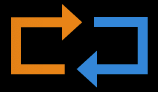

In [111]:
hot100

In [121]:
for row in soup.select("li.o-chart-results-list__item"):
    print(row.select("span").get_text(strip=True))

In [130]:
soup.select("span.c_label")

[]

In [128]:
soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 250 Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/chart/top" rel="canonical"/>
<meta content="http://www.imdb.com/chart/top" property="og:url">
<script>
    if (typeof uet == 'function') {
      uet("bb", "Load